In [70]:

# imports
%matplotlib notebook
import sys
from astropy.table import Table
from astropy.io import fits

from specdb.specdb import UVQS
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import glob
import numpy.ma as ma
import math
from scipy.optimize import curve_fit
import pylab as plb
from scipy.optimize import fmin
from scipy import asarray as ar,exp

Line Fluxes:

In [2]:
# OII3726 = 
# OII3729 = 
# Halpha = 


Equivalent Width Calculator

In [3]:
def eqw(flux, sigma, mean, continuum):
    gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-.5)*((x-mean)/(sigma))**2)
    ew = (flux * sigma * np.sqrt(2*np.pi))/(flux + continuum)

Load UVQS

In [4]:
uvqs = UVQS("/Users/catherinemanea/SOFTWARE/specdb/specdb/data/DB/UVQS_DB_v01.hdf5")

Database is uvqs
Created on 2017-Mar-13
Version: v01


In [5]:
spec,meta = uvqs.spectra_from_coord('J060819.93-715737.4')

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 0.00048 Gb
Loaded spectra


/Users/catherinemanea/Documents/j0608/data/spec/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


<IPython.core.display.Javascript object>


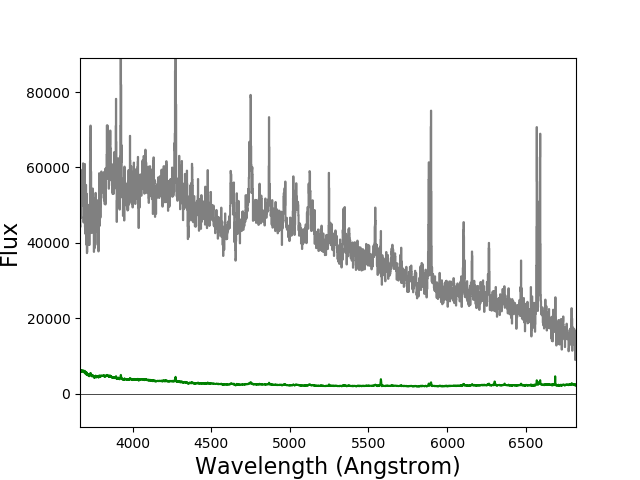

<function matplotlib.pyplot.show(*args, **kw)>

In [6]:
plt.figure()
spec.plot()
plt.show

#Original UVQS plot is in air (OI line in error spectrum is in air)

In [14]:
spec.vactoair()

<IPython.core.display.Javascript object>


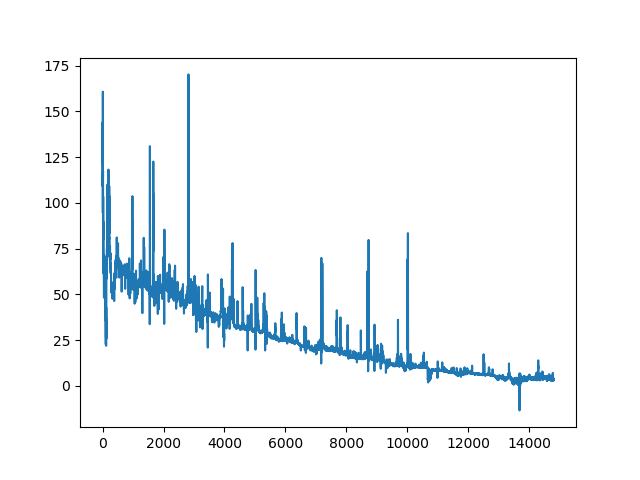

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
hdu = fits.open("/Users/catherinemanea/Documents/j0608/data/spec/UVQSJ0608_F.fits")
data = hdu[0].data
header = hdu[0].header
plt.figure()
plt.plot(data)
plt.show

In [9]:


IDlist = np.array(["OII", "OII", "H-alpha", "CII", "CII", "CII", "CII", "CII", "CII", "CII", "CII?", 
                   "CII", "CII", "CII", "CII", "CII", "H-Beta","HeI", "HeI","H-Gamma","HeI","CII(blend)","CII","HeI","HeI",
                  "HeI","NII","CII","CII","CII","OI"])
wavelist = np.array([3726,3729,6562.8,4735.5,4738,4744.8,4747.3,3919,3920.7,4267,5696,5535,
                     5538,5640.5,5648.1,5662.5,4861.3,3888.8,4471.5,4340.5,4713.2,4727.4,
                    4867.1,4921.9,5015.7,5875.621,6583.4,6578.05,7231.32,7236.42,8446.5])
ltamplist = np.array([29.9566,41.9784,47.6674,8.60973,25.0131,38.4132,11.3409,
                     43.2061,63.0645,117.587,3.30404,12.0676,9.88802,11.2093,10.4825,
                     9.56858,21.9999,80.9721,23.2747,11.0857,13.5711,3.28066,8.32506,
                     8.81376,34.3857,50.7593,65.0618,46.8819,53.4903,68.5576,4.46199])
ltfluxlist = np.array([37.5148,72.6959,93.0115,12.4469,36.8169,53.0823,
                      15.9363,39.4765,75.722,198.201,10.5659,17.6963,14.698,
                      18.6603,15.0422,19.1306,49.5357,88.0376,25.116,15.2397,15.8319,15.9571,
                      13.147,8.29662,48.1474,90.8098,142.102,96.4231,121.826,169.349,17.4819])
ltsigmalist = np.array([0.522828,0.666173,0.77844,0.576744,0.587204,0.551288,0.560596,0.364505,
              0.479013,0.672446,1.27577,0.585022,0.593006,0.664124,0.572478,0.79761,0.898273,0.433753,
                       0.430504,0.548432,0.465402,1.94045,0.630011,0.375534,0.558606,0.713719,0.867336,
                       0.820514,0.908604,0.985458,1.56304])

ALISamps = np.array([42.77516531,77.85115049,88.62622324,19.17002521,39.62488863, 63.25722671,21.07628567,
           54.19253627, 85.23831526,192.32010224,9.33606369,25.52938878,19.38213465,
           26.79359870,19.28771929 ,30.17951390,50.40331768, 208.00193265,109.19890187,13.32376329,17.62988543,
                    11.62721036,12.67911646,15.17858440,142.14235722,106.30908122,127.44251529,
                    88.32574417,138.35055534,175.76359492,11.33401701])
ltEW = np.array([-0.600194,-1.19847,-6.19474,-0.309619,-0.956699,-1.32844,-0.397401,
                -0.615879,-1.25409,-3.92277,-0.499422,-0.637489,-0.521914,-0.862307,
                -0.681624,-0.821259,-1.53706,-1.69477,-0.637667,-0.343421,-0.44147,-0.4265,
                -0.39346,-0.273873,-1.59505,-4.30264,-10.2084,-6.77047,-7.40758,-11.3095,-2.82499])

testtrueamp = ALISamps/(np.sqrt(2*np.pi)*ltsigmalist)

ALISoutputerror = np.array([0.87617437,1.03550501,0.56233159,0.28312678,0.31445385,0.36953007,
                        0.30707780,0.63977559,0.53964196,0.83642652,0.54556913,0.52597222,
                        0.44849997,0,0,0,0.81205671,0.50978079,0.32922098,0.63076546,2.37350700,
                           1.05306788,0.64103538,5.03815439,1210.96099594,5.69184788,0.56036121,0.79831351,
                           0.48882168,0.57110389,1.91528482])
ALISamperror = ALISoutputerror/(np.sqrt(2*np.pi)*ltsigmalist)

disp = np.array([28.28465023,47.14162010,13.77654175,41.10321580,33.87979382,
                 34.07004398,35.51605182,24.92689087,29.96034149,33.73420455,
                51.83459374,15.63190002,18.85629699,30.39219607,19.64329905,44.10607868,38.62826586,32.03666039,31.53309417,
                12.34896758,11.41304437,94.08975441,19.65719492,0.62530241,33.39062709,24.98530095,21.82449280,17.75288092,
                27.99394419,30.25865637,2.83397483])

ALISredshift = np.array([0.00101732,0.00102614,0.00104012,0.00105062,0.00107972,
                        0.00108022,0.00106138,0.00109745,0.00112373,0.00117346,
                        0.00111300,0.00113552,0.00100232,0.00106467,0.00109566,0.00105423 ,0.00116290,0.00104850,
                        0.00106025,0.00106227,0.00110079,0.00103903,0.00104268,0.00108936,
                        0.00101082,0.00111684,0.00106292,0.00113536,0.00108473,0.00110801,0.00105236])
ALISwave = (ALISredshift*wavelist)+wavelist

ALISrederror = np.array([0.00000296,0.00000257,0.00000080,0.00000361,0.00000172,0.00000148,
                        0.00000326,0.00000212,0.00000098,0.00000072,0.00000751,0.00000169,
                        0.00000229,0.00000226,0.00000252,0.00000256,0.00000367,0.00013978,0,
                        0.00000391,0.00001187,0.00001790,0.00000422,0.00018845,0.00058806,
                        0.00000403,0.00000045,0.00000126,0.00000062,0.00000045,0.00000601])
ALISwaveerror = ((ALISredshift+ALISrederror)*wavelist)+wavelist - ALISwave

ALISsigmalist = (disp*ALISwave/c)*(10**3)

#ABSORPTION:

ALISabsorptionamp = np.array([0,0,0,0,0,0,0,0,0,0,0, 
                   0, 0, -10.24052136, -6.57399808, -17.94030836, 0,-131.49886020, -100.46678529,0,
                             -8.45369996,0,0,-24.47923733,-108.29356861,-32.55674125,0,-15.82288788,0,0,0])

ALISabsorptionred = np.array([0,0,0,0,0,0,0,0,0,0,0,
                     0,0.000925479066,0.000884101843,0.000881360881,0,0.000950462041,0.000970615563,0,
                             0.000842047469,0,0,0.000867151974,0.000926355975,0.000853892191,0,0.000791629062,0,0,0])
    
ALISabsorptiondisp = np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0.80486820,0.77443895,15.68201579,0,36.68366252,34.66348842,0,17.43619941,
                              0,0,34.58230912,28.35008748,41.25975387,0,0.44705849,0,0,0])

LTabsorptionsigma = np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                     0,0.0984104,0.357868,0.353257,0,0.34354,0.379122,0,0.283475,0,0,0.466662,
                             0.344306,0.713719,0,0.443785,0,0,0])
                              
ALISabsorptionwave = (ALISredshift*wavelist)+wavelist

ALISabsorbtionsigma = (ALISabsorptiondisp*ALISabsorptionwave/c)*(10**3)                         

absorbtrueamp = ALISabsorptionamp/(np.sqrt(2*np.pi)*LTabsorptionsigma)                                
                                
     

ratios = testtrueamp/testtrueamp[16]



table = Table([wavelist, IDlist, np.round(ALISwave,4), ltamplist, testtrueamp, ALISamps, ltfluxlist, np.round(ltEW,4), np.round(ratios,4),np.round(ALISamperror,4),np.round(disp,4),
              np.round(ALISwaveerror,5),np.round(ALISsigmalist,4),np.round(ltsigmalist,4),np.round(absorbtrueamp,4),np.round(ALISabsorbtionsigma,4)], 
                     names = ('Wavelength','ID','Observed Wavelength',
                             'Linetools Amp','ALIS Reduced Amp','ALIS Direct Output', 'Linetools Flux', 'Linetools EW', 'Amplitude Relative to H-Beta','Error in Amplitude','Dispersion',
                              'Error in Wavelength','ALIS sigma','LT sigma','ALIS Absorption Amp','ALIS Absorption Sigma'))


table['Wavelength'].unit = '(Angstroms)'
table['Linetools EW'].unit = '(Angstroms)'
table['Amplitude Relative to H-Beta'].unit = '(H-Beta = 22.385)'
table['ALIS Reduced Amp'].unit = '(Amp/(sigma*sqrt(2pi))'
table['Error in Amplitude'].unit = ' '
table['Dispersion'].unit = '(km/s)'
table['Observed Wavelength'].unit = '(Angstroms)'
table['Error in Wavelength'].unit = '(Angstroms)'
table['ALIS Absorption Amp'].unit = ' '
table['ALIS Absorption Sigma'].unit = '(Angstroms)'
print(table['Observed Wavelength','ALIS Reduced Amp','ALIS Absorption Amp'])

Observed Wavelength    ALIS Reduced Amp    ALIS Absorption Amp
    (Angstroms)     (Amp/(sigma*sqrt(2pi))                    
------------------- ---------------------- -------------------
          3729.7905      32.63945694056106                 nan
          3732.8265     46.621696628887264                 nan
          6569.6261      45.42000360044711                 nan
          4740.4752     13.260187488088915                 nan
          4743.1157     26.920871504119532                 nan
          4749.9254     45.776404121906914                 nan
          4752.3387     14.998718270522511                 nan
          3923.3009     59.312475824175664                 nan
          3925.1058        70.990073061484                 nan
          4272.0072     114.09781626281114                 nan
                ...                    ...                 ...
          4732.3119      2.390469126092176                 nan
          4872.1748      8.028805265348923             

/Users/catherinemanea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


In [8]:
print(table['Wavelength','ID','ALIS sigma','LT sigma'])

NameError: name 'table' is not defined

## Sort by Wavelengths

In [9]:
#print(table['Wavelength','ID','Linetools Amp','ALIS Reduced Amp'])
tablebywav = table.group_by('Wavelength')
print(tablebywav['Wavelength','ID','Observed Wavelength','Amplitude Relative to H-Beta'][:16])

NameError: name 'table' is not defined

## Convert to Latex Table:

In [10]:
data = tablebywav['Wavelength','ID','Observed Wavelength','Amplitude Relative to H-Beta','Linetools EW']
ascii.write(data, format='latex')

NameError: name 'tablebywav' is not defined

In [11]:
17.940/(np.sqrt(2*np.pi)*0.353257)

20.260106693998146

In [71]:
def airtovac(wavelength):
    """ Convert air-based wavelengths to vacuum

    Parameters:
    ----------
    wave: ndarray
      Wavelengths in Ang

    Returns:
    ----------
    wave: Quantity array
      Wavelength array corrected to vacuum wavelengths
    """
    # Standard conversion format
    sigma_sq = (1.e4/wavelength)**2. #wavenumber squared
    factor = 1 + (5.792105e-2/(238.0185-sigma_sq)) + (1.67918e-3/(57.362-sigma_sq))
    factor = factor*(wavelength>=2000.) + 1.*(wavelength<2000.) #only modify above 2000A

    # Convert
    new_wave = wavelength*factor
    return new_wave

In [13]:
airtovac(5577.34)

5578.888770993516

In [14]:
airtovac(3920.7)

3921.810352698783

## Determine if ALIS spectrum is vac or air using H-Alpha line:

In [15]:
air = 6562.801 #h-alpha emission in air
vac = 6564.614 #h-alpha emission in vac

In [16]:
dupontairmean = 6568.94
(dupontairmean - air)/air #this should be the true redshift


0.0009354237618966678

In [17]:
(dupontairmean - vac)/vac

0.0006589877180897494

In [18]:
UVQSMean=6569.62

In [19]:
(UVQSMean - air)/air # z-shift if in air

0.001039038057073421

In [20]:
(UVQSmean-vac)/vac #Z-shift in vac

NameError: name 'UVQSmean' is not defined

In [21]:
ALISspecmean = 6568.08

In [22]:
(ALISspecmean-air)/air

0.0008043821532908801

In [23]:
6564.614*(1.000800671642)

6569.870100270476

## CONVERTING FROM AIR TO VAC

In [24]:
vacwavelist = airtovac(wavelist)

NameError: name 'wavelist' is not defined

In [25]:
airtovactable = Table([wavelist,vacwavelist], 
                     names = ('Air Wavelength','Vac Wavelength'))
print(airtovactable.group_by('Air Wavelength')[:])

NameError: name 'wavelist' is not defined

# ALIS reader

## Read and distribute all ALIS .mod.out info into lists

In [336]:
c = 3*(10**8)
chars = "wave= =IntFluxredshiftoibamplitude"

files = glob.glob('/Users/catherinemanea/Documents/j0608/fits/*.mod.out')

#initiate lists (separate ones for absorption)
amplist = []
amperrlist = []
redlist = []
rederrlist = []
displist = []
disperrlist = []
restwavelist = []


for file in files:
    modoutfile = open(file,"r")
    lines = modoutfile.readlines()
    for line in lines:
        if "gaussian  " in line:
            if line[0] != "#":
                amplitude = line[13:29].strip(chars)
                amplist.append(float(amplitude))
                redshift = line[29:44].strip(chars)
                redlist.append(redshift)
                disp = line[44:60].strip(chars)
                if disp[1] == " " or disp[2] == " ":
                    disp = disp[2:].strip(chars)
                displist.append(float(disp))
                restwave = line[75:96].strip(chars)
                restwavelist.append(float(restwave))
            if line[0] == "#" and line[2] != " ":
                amperr = line[14:29].strip(chars)
                amperrlist.append(float(amperr))
                rederr = line[30:45].strip(chars)
                rederrlist.append(rederr)
                disperr = line[49:62].strip(chars)
                disperrlist.append(float(disp))
    modoutfile.close()
    
    
    
cleanredlist = []
cleanrederrlist = []


#convert redshifts into decimal form
for item in redlist:
    if 'E' in item:
        item = float(item[:-4])*(10**(-4))
    cleanredlist.append(float(item))
for item in rederrlist:
    if 'E' in item:
        if item[-1:] == "-" or item[-1:] == "E" or item[-1:]==0:
            item = float(item[:-4])*(10**(-6))
        else:
            item = float(item)
    cleanrederrlist.append(float(item))

tt = Table([restwavelist,displist,cleanredlist], 
                     names = ('Wave','Disp','Red'))



In [337]:
tt.group_by('Wave')

Wave,Disp,Red
float64,float64,float64
3727.1,28.28952132,0.000721896397
3730.1,47.14071473,0.000677272584
3889.75,46.76024158,0.0006368223900000001
3889.75,25.18841798,0.00083934362
3920.1,6.09193178,0.000816439386
3921.8,21.24468951,0.000842782634
4102.85,31.20991519,0.0008353298240000002
4268.2,33.73560058,0.0008919862200000001
4341.7,14.26322069,0.000785588112


## Extract P Cygni Info

In [338]:
ii = 0
PCyg = []
PCygerr = []
PCygdisp = []
PCygdisperr = []
PCygred = []
PCygrederr = []
flagged = []

for numm in [3, 23, 27, 50, 52, 53, 54, 69, 70, 72, 85, 92, 93, 108, 109, 110, 117, 118]:
    print(restwavelist[numm])



for item in restwavelist:
    while ii < len(restwavelist)-1:
        if restwavelist[ii] == restwavelist[ii+1]:
            PCyg.append(np.round(float(amplist[ii]),4))
            PCygerr.append(np.round(float(amperrlist[ii]),4))
            PCygdisp.append(np.round(float(displist[ii]),4))
            PCygdisperr.append(np.round(float(disperrlist[ii]),4))
            PCygred.append(np.round(float(cleanredlist[ii]),4))
            PCygrederr.append(np.round(float(cleanrederrlist[ii]),4))
            
            restwavelist.remove(restwavelist[ii])
            amplist.remove(amplist[ii])
            amperrlist.remove(amperrlist[ii])
            #displist.remove(displist[ii])
            disperrlist.remove(disperrlist[ii])
            cleanredlist.remove(cleanredlist[ii])
            cleanrederrlist.remove(cleanrederrlist[ii])
            flagged.append(ii)
            ii = ii+1
        else:
            PCyg.append(0)
            PCygerr.append(0)
            PCygdisp.append(0)
            PCygdisperr.append(0)
            PCygred.append(0)
            PCygrederr.append(0)
            ii = ii+1
PCyg.append(0)
PCygerr.append(0)
PCygdisp.append(0)
PCygdisperr.append(0)
PCygred.append(0)
PCygrederr.append(0)


for num in flagged:
    displist.remove(displist[num]) 

6579.87
5539.5
5369.94
5260.5
4268.2
5877.25
5877.25
8065.0
8078.8
4739.3
6814.2
4626.89
4628.69
4735.9
7067.1
6463.7
4412.7
4414.5


## Create linelist dict:

In [339]:
IDdict = {3727.1:"OII",   3730.1:"OII",   3889.75:"HeI",   3889.9:"HeI",   3920.1:"CII",   3921.8:"CII",   4102.85:"H-Delta",   4268.2:"CII",   4341.7:"H-Gamma",
 4369.3:"CII",   4371.9:"CII",   4373.6:"CII",   4375.5:"CII",   4376.2:"CII",   4377.8:"CII",   4410.4:"CII",   4411.2:"CII",
 4412.4:"CII",   4412.7:"CII",   4414.5:"CII",   4416.14:"CII",  4418.215:"CII", 4472.73:"HeI",   4619.69:"CII",  4620.49:"CII",
 4626.89:"CII",  4628.69:"CII",  4631.29:"CII",  4714.5:"HeI",   4728.7:"CII",   4735.9:"CII",   4736.8:"CII",   4739.3:"CII",
 4746.1:"CII",  4748.6:"CII",   4862.7:"H-Beta",   4868.5:"CII", 4923.3:"HeI",   5017.1:"HeI",   5032.1:"??",   5035.9:"CII",
 5040.7:"??",   5041.8:"CII",   5044.3:"CII",   5045.:"CII",    5047.1:"CII",   5049.2:"??",   5109.3:"CII",   5115.1:"CII",
 5115.7:"CII",   5118.1:"CII",   5120.8:"CII",   5121.5:"CII",   5123.2:"CII",   5123.9:"CII",   5126.6:"CII",   5128.3:"CII",
 5134.3:"CII",   5134.7:"CII",   5138.7:"CII",   5140.6:"CII",   5144.9:"CII",   5146.6:"CII",   5152.5:"CII",   5250.989:"CII",5251.45: "CII",
 5255.02:"CII",   5257.55:"CII",   5258.7:"CII",   5260.5:"CII",   5261.22:"CII",   5334.4:"CII",   5336.3:"CII",   5342.96:"CII",
 5369.94:"CII",  5370.03:"CII",  5374.355:"CII", 5536.5:"CII",   5539.5:"CII",   5642.1:"CII",   5649.7:"CII",   5664.1:"CII",
 5697.6:"CII",   5877.25:"HeI",  6463.7:"CII",   6564.614:"H-Alpha", 6579.9:"CII",  6584.69:"NII",   6679.9:"HeI",
 6782.5:"CII",   6785.8:"CII",   6789.:"CII",    6793.4:"CII",   6800.:"CII",    6802.6:"CII",   6814.2:"CII",   7067.1:"HeI",
 7114.5:"CII",   7115.:"CII",    7117.6:"CII",   7127.7:"CII",   7134.4:"CII",   7136.1:"CII",   7146.2:"CII",   7233.3:"CII",
 7238.4:"CII",   7239.2:"CII",   7283.3:"HeI",   7321.:"OII",    7332.:"OII",    7507.73:"CII",   7510.96:"CII",    7521.6:"CII",
 7522.:"CII",    7532.64:"CII",   7771.5:"OI",   7777.5:"OI",   8031.1:"CII",   8039.9:"CII",   8041.6:"CII",   8050.5:"CII",
 8064.3:"CII",   8065.:"CII",    8078.8:"CII",   8448.8:"OI", 6579.87:"CII", 5369.83:"CII", 7773.9:"CIII?", 7774.08:"OI", 7776.31:"OI", 7777.53:"OI",
         5016.73: "HeI"}

## Create ID column

In [340]:
IDs = []
for item in restwavelist:
    IDs.append(IDdict[item])

## Create table

In [341]:
print(len(PCyg))
print(len(PCygdisp))
print(len(PCygdisperr))
print(len(PCygerr))

121
121
121
121


In [342]:

amplist,redlist,displist,restwavelist = np.array(amplist),np.array(redlist),np.array(displist),np.array(restwavelist)
cleanredlist = np.array(cleanredlist)
PCyg , PCygdisp = np.array(PCyg), np.array(PCygdisp)

observedwavelist = restwavelist*(cleanredlist+1)

parsetable = Table([np.round(amplist,2),cleanredlist,np.round(displist,2),restwavelist,PCyg, PCygerr, PCygdisperr,np.round(amperrlist,4),np.round(disperrlist,2),cleanrederrlist,IDs,PCygred,PCygdisp], 
                     names = ('ALIS Amplitude','Redshift','Dispersion','Rest Wavelength',"P Cygni Amp","P Cyg Err","P Cyg Disp Err",
                             "Amp Err","Disp Err","Redshift Err","ID","PCygRed","PCygDisp"))


## Create observed wavelength column

In [343]:
observedwaves = np.array(restwavelist*(cleanredlist+1))

siglist = observedwaves*displist/c

parsetable["Observed Wavelength"] = np.round(observedwaves,1)
parsetable["Observed Wave Err"] = np.round(restwavelist*(cleanredlist+cleanrederrlist+1) - observedwaves,4)

## Create Integrated Flux Column

In [344]:
#?

## Velocity Column (based on doppler shift)

In [345]:
parsetable["Velocity"] = np.round(parsetable["Redshift"]*c/(10**3),2)
parsetable["PCygV"] = np.round(parsetable["PCygRed"]*c/(10**3),2)

## Create columns with values plus/minus error (unnecessary for now)

In [346]:
ii = 0
obserwav = []
pc = []
amp = []
dis = []

for item in observedwaves:
    obserwav.append(str(np.round(item,1))+"$\pm$"+str(parsetable["Observed Wave Err"][ii]))
    ii = ii+1

jj = 0
for item in PCyg:
    pc.append(str(item)+"$\pm$"+str(PCygerr[jj]))
    jj = jj+1
    
bb = 0
for item in amplist:
    amp.append(str(np.round(item,2))+"$\pm$"+str(np.round(amperrlist[bb],2)))
    bb = bb+1
    
cc = 0
for item in displist:
    dis.append(str(np.round(item,2))+"$\pm$"+str(np.round(disperrlist[cc],2)))
    cc = cc+1

parsetable["ObsWav"] = obserwav
parsetable["PC"] = pc
parsetable["amp"] = amp      
parsetable["dis"] = dis


## Create columns for amplitudes as ratio to H-Beta

In [347]:
parsetable["ratioamp"] = np.round(amplist/50.40253105,2)
ratiopc = []
for item in PCyg:
    ratiopc.append(np.round(float(item)/50.40253105,2))
parsetable["ratiopc"] = ratiopc

In [349]:
parsetable.group_by("Rest Wavelength")["ID","Rest Wavelength","Dispersion","Redshift"][75:95]






ID,Rest Wavelength,Dispersion,Redshift
str7,float64,float64,float64
CII,5649.7,44.68,0.000808309103
CII,5664.1,35.78,0.000771444053
CII,5697.6,44.57,0.000831856763
HeI,5877.25,24.52,0.0008393611500000001
CII,6463.7,28.71,0.0007797499460000001
H-Alpha,6564.614,38.0,0.000763503895
CII,6579.87,14.57,0.0008574199080000001
NII,6584.69,19.34,0.0008672285400000001
HeI,6679.9,132.05,0.0008636388760000001


## Convert to Latex Table

In [188]:
ascii.write(parsetable.group_by("Rest Wavelength")["ID","Rest Wavelength","Velocity","ObsWav","ratioamp","Dispersion","ratiopc","PCygV","PCygDisp"], Writer=ascii.Latex, latexdict=ascii.latex.latexdicts['template'])






\begin{tabletype}[tablealign]
preamble
\caption{caption}
\begin{tabular}{col_align}
header_start
ID & Rest Wavelength & Velocity & ObsWav & ratioamp & Dispersion & ratiopc & PCygV & PCygDisp \\
 &  &  &  &  &  &  &  &  \\
header_end
data_start
OII & 3727.1 & 216.57 & 3729.8$\pm$0.0036 & 0.85 & 28.29 & 0.0 & 0.0 & 0.0 \\
OII & 3730.1 & 203.18 & 3732.6$\pm$0.0021 & 1.54 & 47.14 & 0.0 & 0.0 & 0.0 \\
HeI & 3889.75 & 251.8 & 3893.0$\pm$0.0192 & 2.45 & 25.19 & -1.17 & 180.0 & 46.7602 \\
CII & 3920.1 & 244.93 & 3923.3$\pm$0.0004 & 1.13 & 6.09 & 0.0 & 0.0 & 0.0 \\
CII & 3921.8 & 252.83 & 3925.1$\pm$0.0003 & 1.69 & 21.24 & 0.0 & 0.0 & 0.0 \\
H-Delta & 4102.85 & 250.6 & 4106.3$\pm$0.0026 & 0.22 & 31.21 & 0.0 & 0.0 & 0.0 \\
CII & 4268.2 & 267.6 & 4272.0$\pm$0.0001 & 3.82 & 25.98 & 0.0 & 0.0 & 0.0 \\
H-Gamma & 4341.7 & 235.68 & 4345.1$\pm$0.0039 & 0.26 & 14.26 & 0.0 & 0.0 & 0.0 \\
CII & 4369.3 & 242.14 & 4372.8$\pm$0.0 & 0.36 & 0.0 & -0.39 & 120.0 & 36.3794 \\
CII & 4371.9 & 218.11 & 4375.1$\pm$0.

In [184]:
(0.88*3*(10**5))/6568

40.19488428745432

In [185]:
40.19*2.3548

94.639412

In [186]:
airtovac(np.array([7505.67,7508.89,7519.49,7519.93,7530.57]))

array([7507.73693768, 7510.95780634, 7521.56066597, 7522.00078467,
       7532.64365519])